     Matrix Size (n)  Relaxation Factor       Norm  Iterations  Runtime (s)
0                100              0.800   9.999986           8     0.279500
1                100              0.801   9.999987           8     0.271273
2                100              0.802   9.999987           8     0.270442
3                100              0.803   9.999988           8     0.284156
4                100              0.804   9.999988           8     0.269136
5                100              0.805   9.999989           8     0.268211
6                100              0.806   9.999989           8     0.269520
7                100              0.807   9.999990           8     0.275387
8                100              0.808   9.999991           8     0.269495
9                100              0.809   9.999991           8     0.288761
10               100              0.810   9.999992           8     0.267612
11               100              0.811   9.999992           8     0.265086
12          

Text(0, 0.5, 'Program Runtime (s)')

<Figure size 432x288 with 0 Axes>

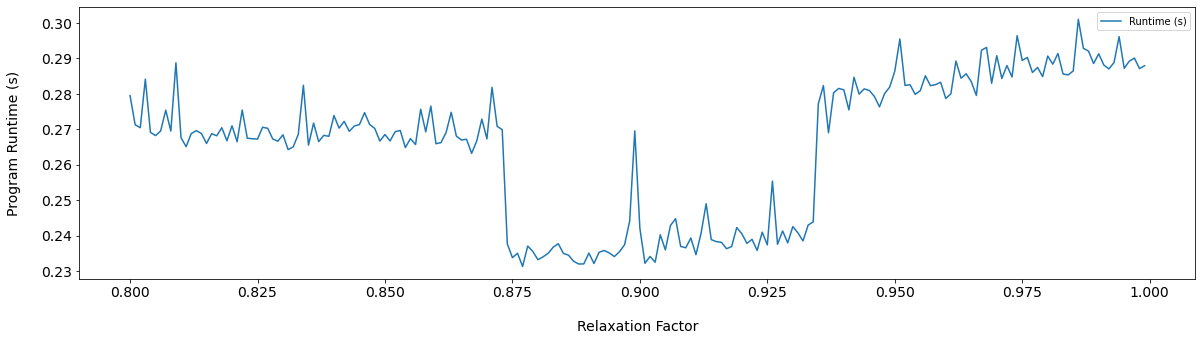

In [141]:
# Converting MATLAB SOR Function to Python for Successive Over Relaxation
import time
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows',None)


#Storage List outside function to avoid being overwritten
data=[] 

def SOR(A, b ,w, convergence):
    
    tic = time.time()

    #Defining critical values
    n = len(b) #Identify dimension of n
    xnew = np.zeros((n,1))
    residual = np.linalg.norm(np.matmul(A, xnew) - b)
    global itera
    itera = 0 #iteration counter
    backstop = 100 #end program after "" iterations
    global df_residual #making the dataframe a global variable to call it 
    global data
    global toc
    global xnorm
    
    
    while residual > convergence:
        
        xprev = xnew[:] #xprev takes on the previous x values each iteration

        for i in range(n):
            
            sigma = 0 #reset sigma every iteration
            
            for j in range(n):
                
                #Create exception diagonal elements
                if j != i:
                        
                   #Summing the upper and lower matrix triangles togther 
                    sigma += (A[i,j] * xprev[j])
     
            #Main Equation for SOR
            xnew[i] = + (1-w)*xprev[i]+((w/A[i,i]) * (b[i] - sigma)) 
            xnorm = np.linalg.norm(xnew)
            
        #Calculating residual value
        residual = (np.linalg.norm(np.matmul(A, xnew) - b))
        toc = time.time() - tic
    
        #Appending Data into Individual Lists at end of each loop
        data.append([n,w,itera, residual, xnorm, toc])
        
        #Iteration Counter
        itera += 1
        
        #Prevent program running infinitely
        if itera > backstop: 
            df_residual = pd.DataFrame(data, columns=['Size','Omega','Iteration','Residual','Norm','Time'])
            break
        
    #Output
    df_residual = pd.DataFrame(data, columns=['Size','Omega','Iteration','Residual','Norm','Time'])
    x = np.linalg.norm(xnew)

# Converting MATLAB Function to Python for (Finding the best omega)

#Defining A and b
n=100
convergence = 0.1
A = np.ones((n,n)) #Defining Dimensions of A Array
b = np.zeros((n)) #Defining Dimensions of b vector
itera_eval = []

for i in range(n):
     A[i,i] = n   #Add diagonal n
     b[i] = 2*n - 1 #Add b variable to b vector

#Domain selector: (0<w<1) or (1<w<2)
#Deciding which side coverges faster
for i in range(2):
    w1 = [0.9, 1.1]
    w = w1[i]

    #Executing SOR Function
    SOR(A,b,w,convergence)
    itera = itera
    itera_eval.append([itera]) #Appending new iteration value into iteration vector

r = 0.001 #Resolution of relaxation factors (0<w<2)

if itera_eval[1] >= itera_eval[0]:
    # (0<w<1) List all omegas between 0 to 1
    w1 = np.arange(0.8,1,r,dtype="float")

elif itera_eval[1] < itera_eval[0]:

    # (1<w<2) List all omegas between 1 to 2
    w1 = np.arange(1,2,r,dtype="float")   

#Resetting itera_eval and data vectors
itera_eval = []
data = []
relax_range = []

#Looping through range of relaxtion values
for i in range(len(w1)):
    w = w1[i]                                  #Relaxation Factor
    SOR(A,b,w,convergence)                     #Executing SOR Function for each omega value
    relax_range.append([n,w,xnorm,itera,toc])  #Appending new iteration value into iteration vector

#Collecting Runtimes for Each Omega Value
df_omega = pd.DataFrame(relax_range, columns=['Matrix Size (n)','Relaxation Factor','Norm','Iterations','Runtime (s)'])
print(df_omega)

#Plotting
plt.figure()
df_omega.plot(x = "Relaxation Factor", y= "Runtime (s)",kind="line",figsize=(20, 5),fontsize=14)
plt.xlabel("Relaxation Factor", labelpad=20,fontsize=14)
plt.ylabel("Program Runtime (s)", labelpad=20,fontsize=14)


#Finding Optimal Relaxation Factor

# n1 = [(100 , 500 , 1000, 5000)]
# w1 = np.zeros[(1,len(n1))]

# best_w(n)

# for i in len(n1):
#     n = n1[i]
#     best_w(n)
#     w1[i] = w
